In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading Dataset into Python

In [3]:
iris_data = pd.read_excel('/content/iris.xls')

In [4]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory Data Analysis

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
## Checking Distribution

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

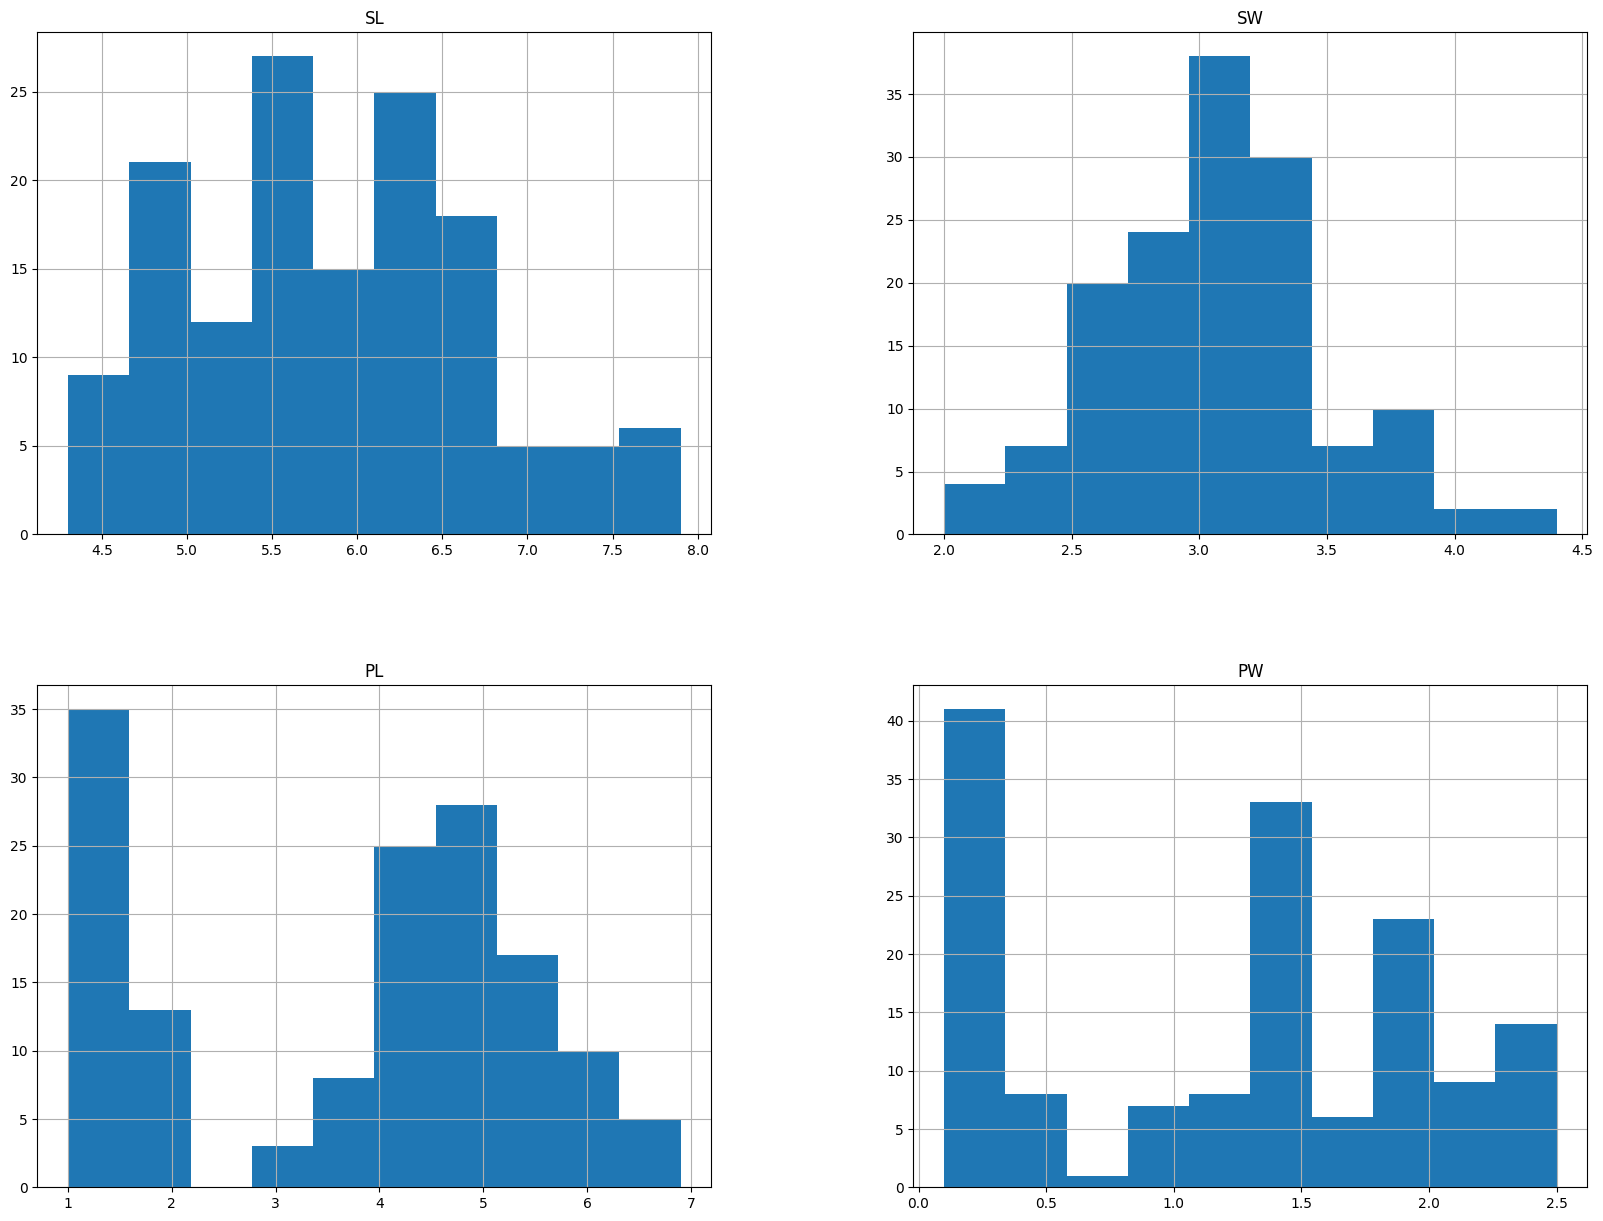

In [63]:
freqgraph = iris_data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

In [9]:
## Checking  and handling Missing Values

In [10]:
iris_data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
iris_data.fillna(method='ffill')

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.9,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.0,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
iris_data.fillna(method='bfill')

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.4,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
 iris_data.median()


<ipython-input-13-ac3957b2d59f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.median()


SL    5.80
SW    3.00
PL    4.35
PW    1.30
dtype: float64

In [14]:
iris_data1 = iris_data.fillna(iris_data.median())
iris_data1.head()

<ipython-input-14-b943c93013b4>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data1 = iris_data.fillna(iris_data.median())


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
## Encoding - Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
iris_data1['Classification']= le.fit_transform(iris_data1['Classification'])
iris_data1.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
## Checking Outliers

In [19]:
num_columns = ['SL','SW','PL','PW','Classification']

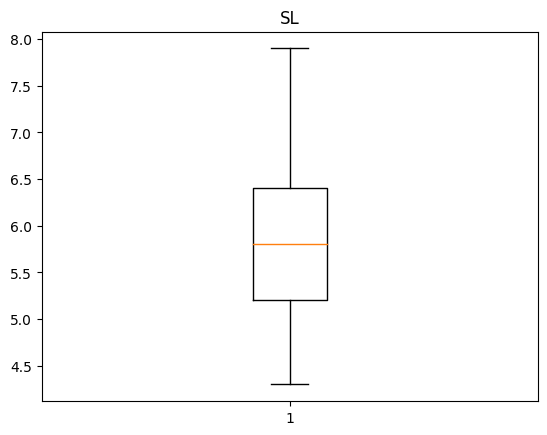

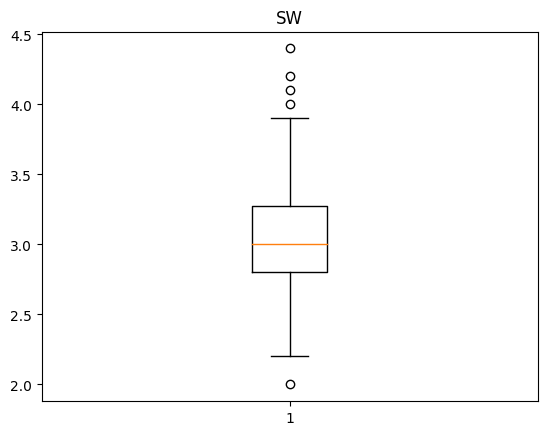

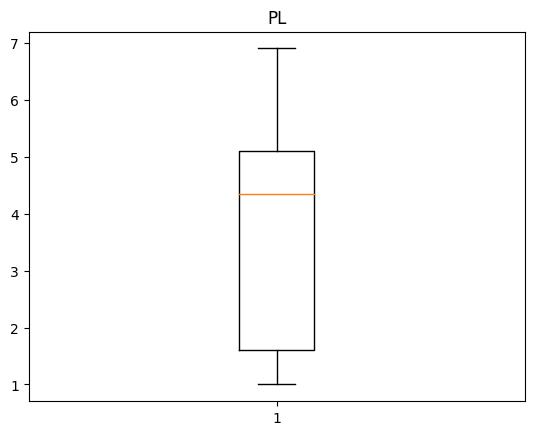

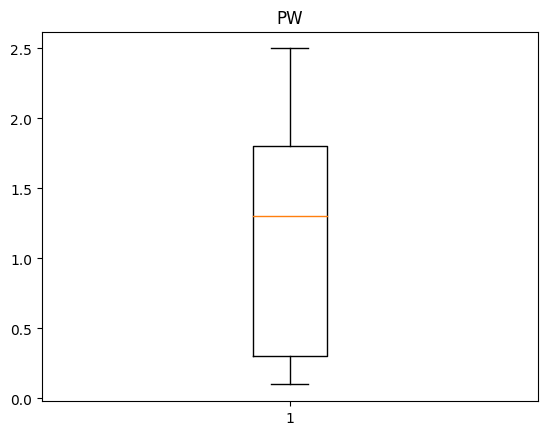

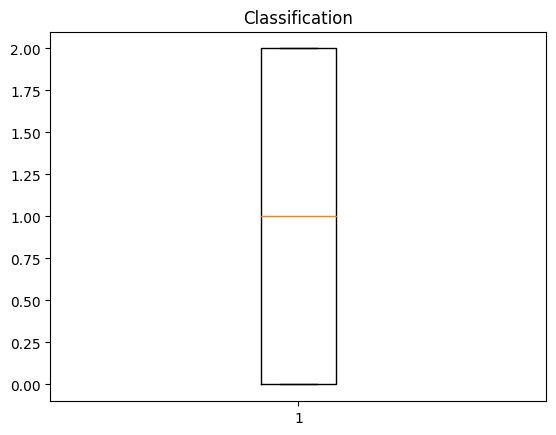

In [20]:
for i in num_columns:
  plt.figure()
  plt.boxplot(iris_data1[i])
  plt.title(i);

In [21]:
Q1 = np.percentile(iris_data1['SW'],25,method='midpoint')
Q2 = np.percentile(iris_data1['SW'],50,method='midpoint')
Q3 = np.percentile(iris_data1['SW'],75,method='midpoint')

In [22]:
print("Q1 is:",Q1)
print("Q2 is:",Q2)
print("Q3 is:",Q3)

Q1 is: 2.8
Q2 is: 3.0
Q3 is: 3.25


In [23]:
IQR = Q3-Q1
print(IQR)

0.4500000000000002


In [24]:

low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("lower value:",low_lim)
print("upper value:",up_lim)

lower value: 2.1249999999999996
upper value: 3.9250000000000003


In [25]:
outliers = []
for i in iris_data1['SW']:
  if((i<low_lim) or (i>up_lim)):
    outliers.append(i)
    print(outliers)

[4.0]
[4.0, 4.4]
[4.0, 4.4, 4.1]
[4.0, 4.4, 4.1, 4.2]
[4.0, 4.4, 4.1, 4.2, 2.0]


In [26]:
iris_data1['SW'] = iris_data1['SW'].clip(lower=low_lim,upper=up_lim)

In [27]:
for i in iris_data1['SW']:
  if((i<low_lim) or (i>up_lim)):
    outliers.append(i)

    plt.boxplot(iris_data1['SW'])
    plt.show();

In [28]:
## Checking Correlation

<Axes: >

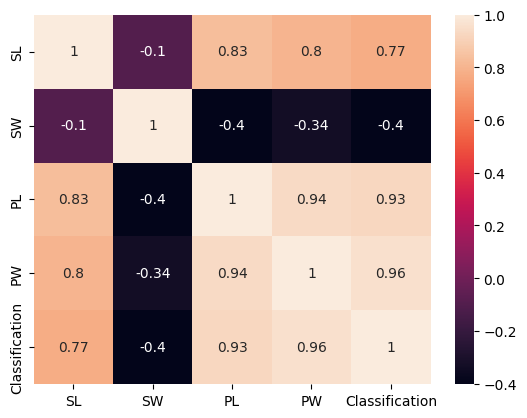

In [29]:
sns.heatmap(iris_data1.corr(),annot=True)

since all the parameters (PW,PL,SW,SL)are very much important for the classification of Iris flower, seems like it would be better not to remove any of these variables eventhough it shows strong positive correlation.

In [ ]:
## X_train_test_split

In [39]:
iris_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [40]:
iris_data1.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
y = iris_data1['Classification']
X = iris_data1.drop(['Classification'], axis=1)
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [45]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [ ]:
## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [47]:
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)
log_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [51]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [52]:
Sclaed_Xtrain = Scaler.fit_transform(X_train)
Sclaed_Xtest = Scaler.fit_transform(X_test)

In [53]:
log_reg.fit(Sclaed_Xtrain,y_train)
log_pred = log_reg.predict(Sclaed_Xtest)

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,log_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]])

In [60]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred))
print('Recall:',recall_score(y_test,log_pred))
print('F1:',f1_score(y_test,log_pred))

Accuracy: 0.9736842105263158


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

Logistic Regression - Accuracy: 0.9736842105263158

In [ ]:
## kNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [69]:
for k in neighbors:
 classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)

In [71]:
classifier.fit(X_train, y_train)
knn_pred = classifier.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, knn_pred)
metric_k.append(accuracy)